In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Loading the data

In [2]:
file = 'mohammad_raw.fif'
raw = mne.io.read_raw(file, preload=False)
print(raw)
raw.load_data()

Opening raw data file mohammad_raw.fif...
    Range : 0 ... 240000 =      0.000 ...    60.000 secs
Ready.
<Raw | mohammad_raw.fif, 4 x 240001 (60.0 s), ~19 kB, data not loaded>
Reading 0 ... 240000  =      0.000 ...    60.000 secs...


Measurement date,"August 30, 2021 10:24:29 GMT"
Experimenter,mne_anonymize
Participant,sub-EL006
Digitized points,25 points
Good channels,"2 ECoG, 2 DBS"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,4000.00 Hz
Highpass,0.00 Hz
Lowpass,2000.00 Hz


In [3]:
raw.plot()  # pop-up plot

Using qt as 2D backend.


<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_indices_by_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.


Using pyopengl with version 3.1.6


Channels marked as bad:
none


# Preprocessing

## Preprocessing 1: Notch filter (50 Hz and its harmonics)

In [4]:
Nyquist_freq = raw.info['sfreq'] / 2
notch_freqs = np.arange(50, Nyquist_freq, 50)
notch_freqs

array([  50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.,
        500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
        950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.,
       1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750., 1800.,
       1850., 1900., 1950.])

Effective window size : 0.512 (s)


/Users/orabe/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


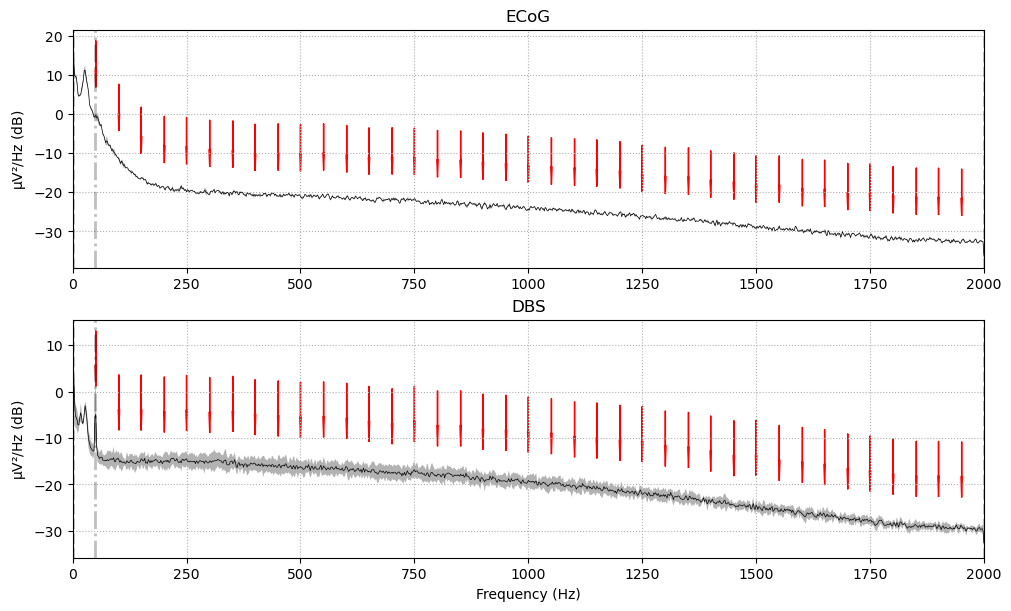

In [5]:
def add_arrows(axes):
    # add some arrows at 60 Hz and its harmonics
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in notch_freqs:
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.2,
                head_width=3,
                length_includes_head=True,
            )


fig = raw.compute_psd().plot(average=True, picks="data", exclude="bads")
add_arrows(fig.axes[:2])
plt.show()

In [6]:
# remove line frequency interference
raw_notch = raw.copy().notch_filter(freqs=notch_freqs)#, picks=meg_picks)# ,trans_bandwidth=3) 

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 26401 samples (6.600 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


/Users/orabe/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/var/folders/jk/skjgj9ps5xs02bklf7l0nsjr0000gn/T/ipykernel_93782/3969452602.py:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.85)
/Users/orabe/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/var/folders/jk/skjgj9ps5xs02bklf7l0nsjr0000gn/T/ipykernel_93782/3969452602.py:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.su

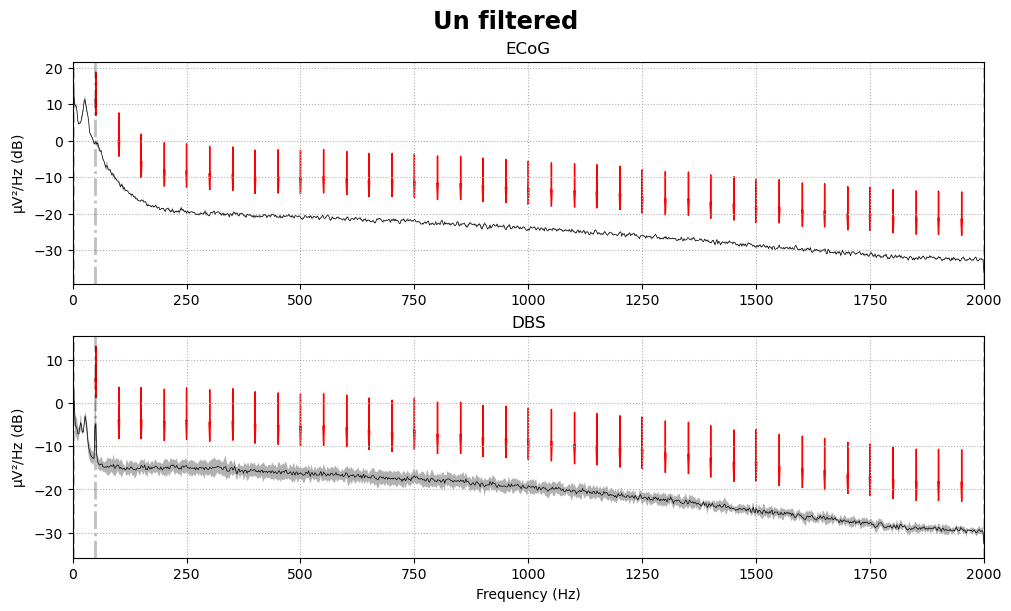

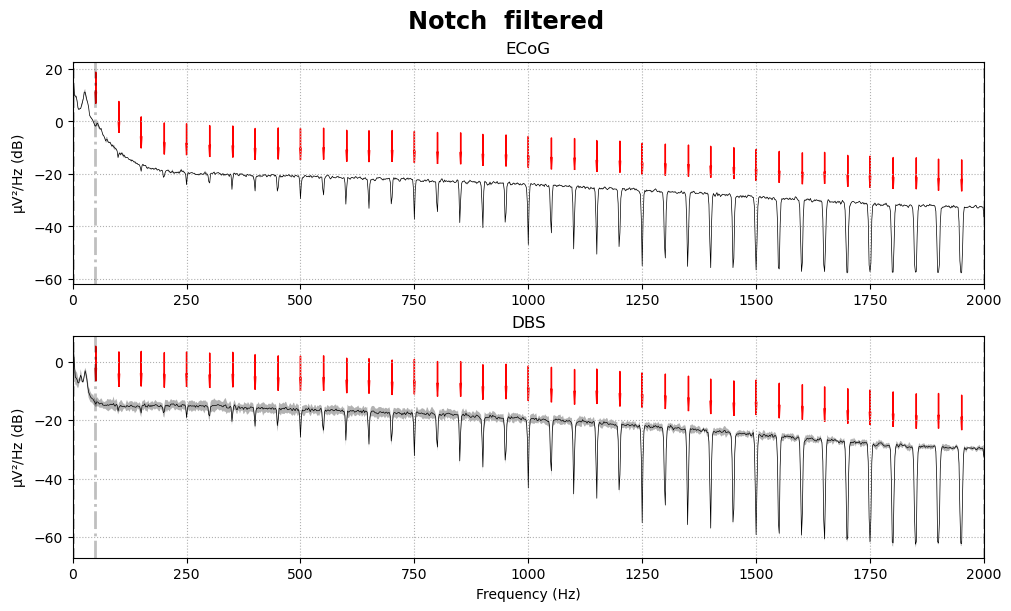

In [7]:
for title, data in zip(["Un", "Notch "], [raw, raw_notch]):
    fig = data.compute_psd().plot(average=True, picks="data", exclude="bads")
    fig.subplots_adjust(top=0.85)
    fig.suptitle("{} filtered".format(title), size="xx-large", weight="bold")
    add_arrows(fig.axes[:2])

plt.show()

In [8]:
raw_notch.plot()

Using pyopengl with version 3.1.6


Channels marked as bad:
none


## Preprocessing 2: Band-pass filter (3 - 100 Hz)
(l_freq < h_freq)


In [9]:
# raw_bandpass = raw_notch.copy().filter(l_freq=3, h_freq=100)
raw_bandpass = raw_notch.copy().filter(l_freq=0, h_freq=100)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 529 samples (0.132 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


Effective window size : 0.512 (s)


/Users/orabe/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


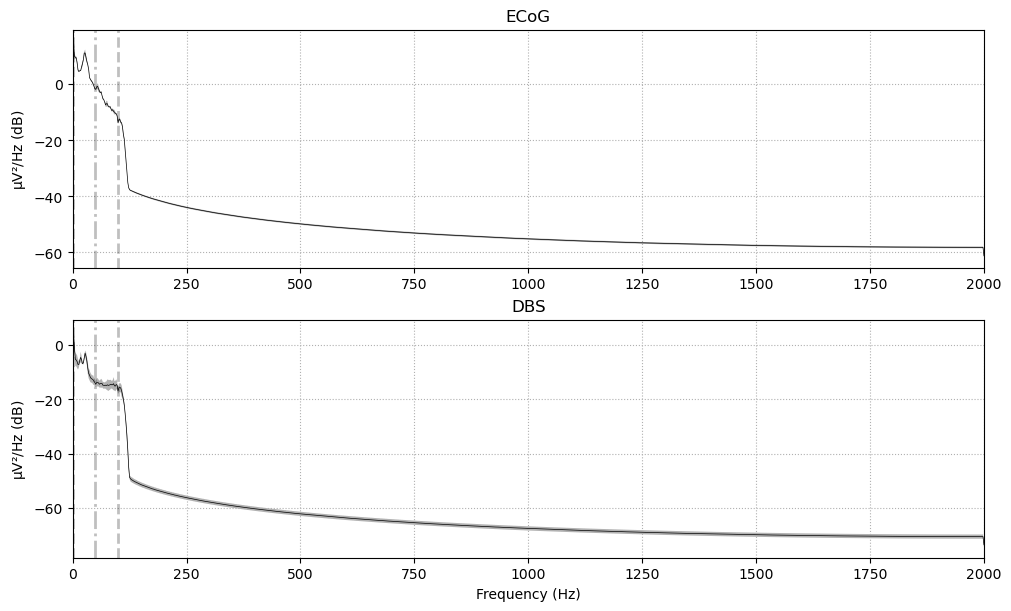

In [10]:
# raw_notch.plot()
raw_bandpass.compute_psd().plot(average=True)

## Preprocessing 3: Epoching
> (n_epochs, n_channels, n_times)

In [11]:
epoch_length = 2 #seconds

# first create events
events = mne.make_fixed_length_events(raw_bandpass, duration=epoch_length)
print('events shape', events.shape, '\n')


epochs = mne.Epochs(raw_bandpass, events, tmin=0, tmax=epoch_length, baseline=(None, None))
print('\n', epochs.get_data().shape)
print(epochs)


events shape (30, 3) 

Not setting metadata
30 matching events found
Setting baseline interval to [0.0, 2.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 8001 original time points ...
0 bad epochs dropped

 (30, 4, 8001)
<Epochs |  30 events (all good), 0 – 2 s, baseline 0 – 2 s, ~19 kB, data not loaded,
 '1': 30>


In [12]:
epochs.plot()

Using data from preloaded Raw for 20 events and 8001 original time points ...
Using data from preloaded Raw for 3 events and 8001 original time points ...


/Users/orabe/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


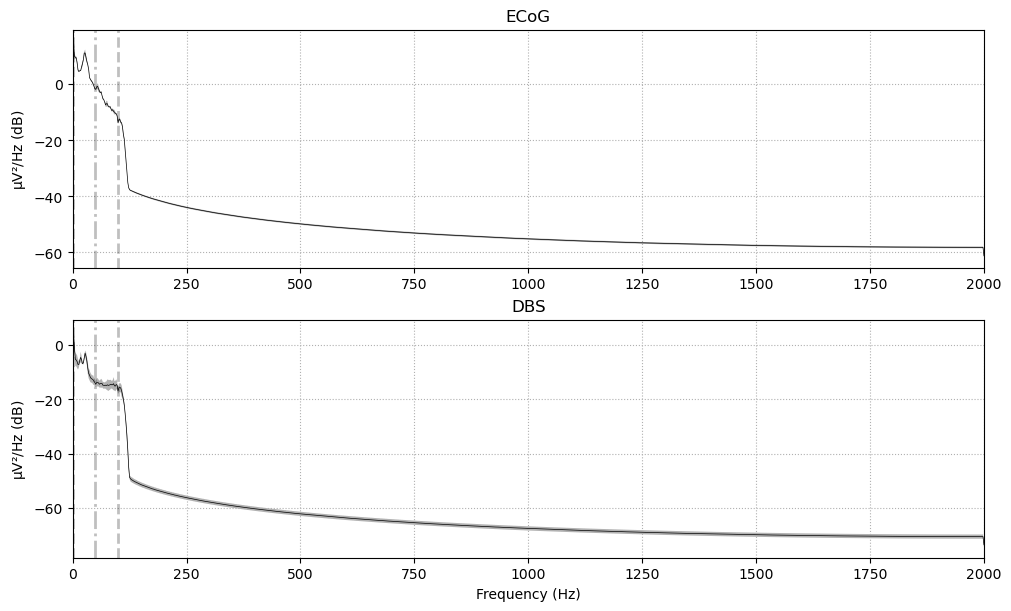

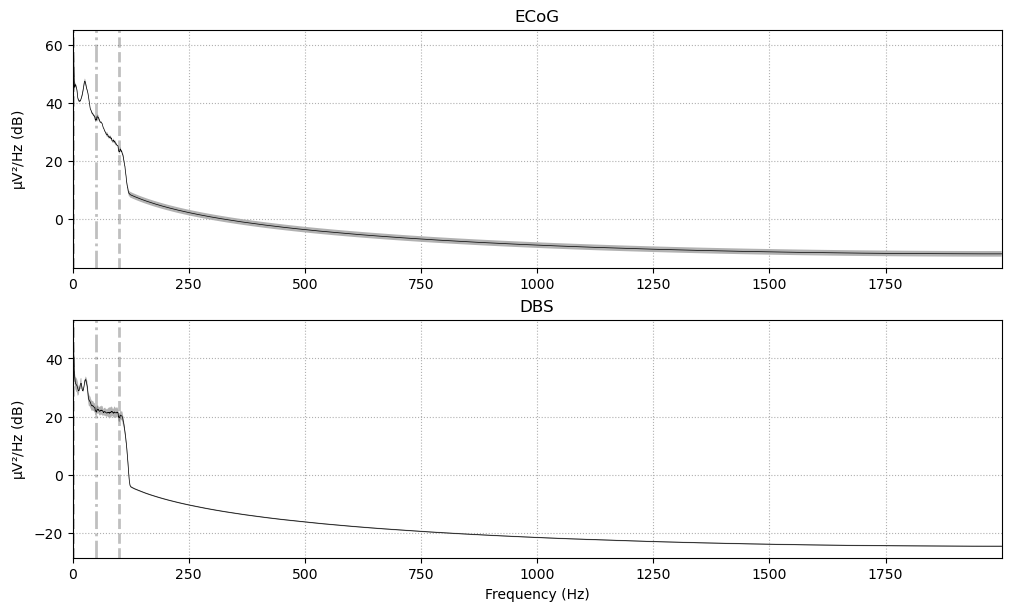

In [13]:
epochs.compute_psd().plot(average=True, picks='data', exclude='bads')
# epochs.compute_psd(picks=['ECoG_01', 'ECoG_02']).plot()
# epochs.compute_psd(picks=['LFP_01', 'LFP_02']).plot()
plt.show()

## Preprocessing 4: Resampling (to 200 Hz)
NOTE: inst.resample requires epochs data to be loaded.

/Users/orabe/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/var/folders/jk/skjgj9ps5xs02bklf7l0nsjr0000gn/T/ipykernel_93782/2347343949.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/orabe/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/var/folders/jk/skjgj9ps5xs02bklf7l0nsjr0000gn/T/ipykernel_93782/2347343949.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


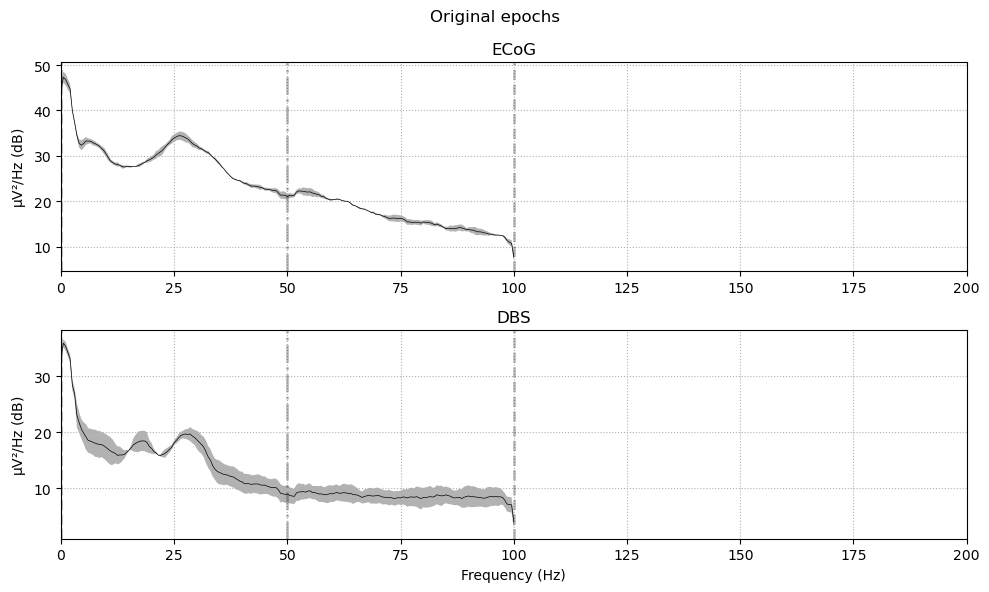

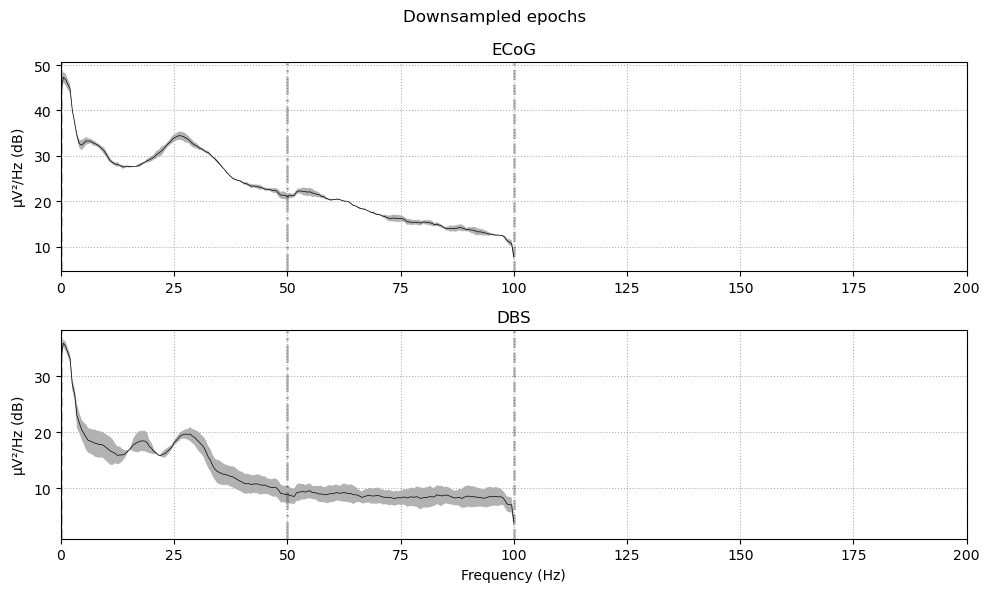

In [14]:
downsampled_sfreq = 200
epochs.load_data()
epochs_downsampled = epochs.resample(sfreq=downsampled_sfreq)

for data, title in zip([epochs, epochs_downsampled], ['Original epochs', 'Downsampled epochs']):
    fig = data.compute_psd().plot(average=True, picks='data', exclude='bads')
    fig.suptitle(title)
    plt.setp(fig.axes, xlim=(0, downsampled_sfreq))
    plt.tight_layout()
plt.show()

['ECoG_01', 'ECoG_02', 'LFP_01', 'LFP_02']


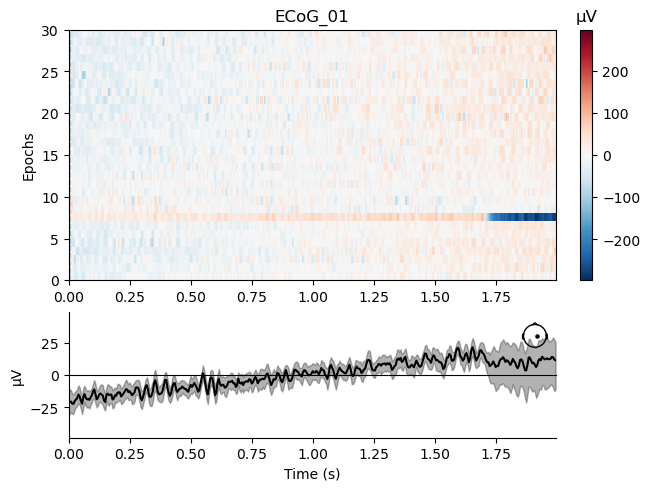

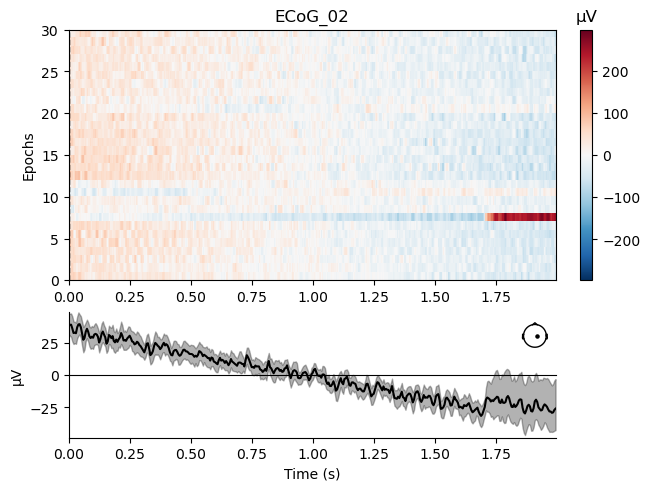

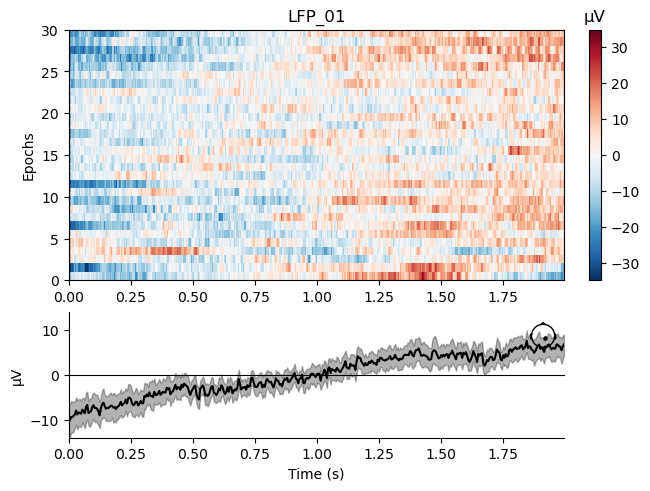

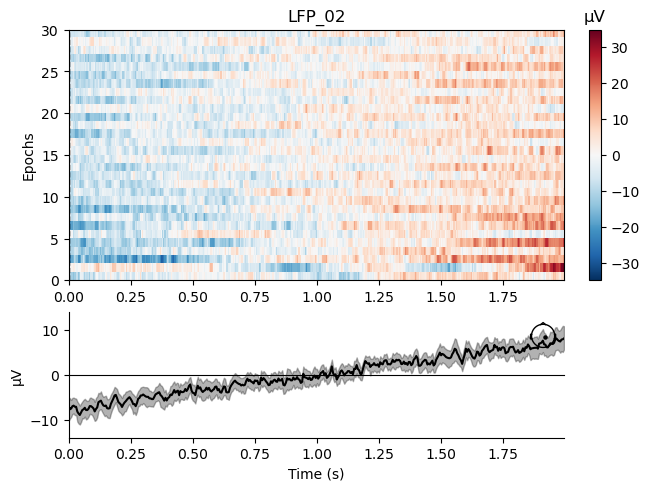

In [15]:
print(epochs_downsampled.ch_names)
epochs_downsampled.plot_image(picks=['ECoG_01', 'ECoG_02'])
epochs_downsampled.plot_image(picks=['LFP_01', 'LFP_02'])
plt.show()

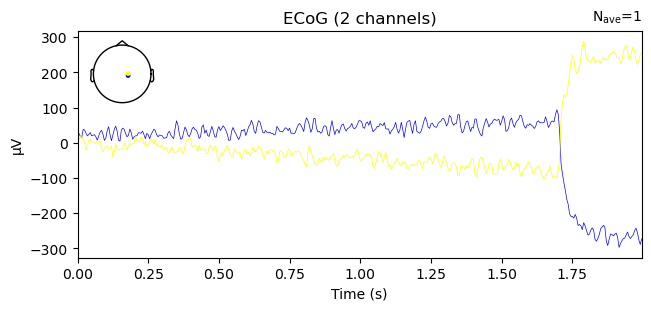

In [16]:
selected_epoch = 7
evoked_downsampled = epochs_downsampled[selected_epoch].average()
evoked_downsampled.plot(picks=['ECoG_01', 'ECoG_02'])
plt.show()

----

----

----

# Bivariate Connectivity

## Coherence
### `SpectralConnectivity` class
### `(n_connections, n_freqs)` or `(n_nodes, n_nodes, n_freqs)`

Note: To speed things up, we use 2 parallel jobs and use mode=’fourier’, which uses a FFT with a Hanning window to compute the spectra (instead of a multitaper estimation, which has a lower variance but is slower). By using faverage=True, we directly average the coherence in the alpha and beta band, i.e., we will only get 2 frequency bins.

In [17]:
from mne_connectivity import spectral_connectivity_epochs, seed_target_indices

In [18]:
# Pick ecog 
picks = mne.pick_types(epochs_downsampled.info, ecog=True, dbs=False)

# Use 'ECoG_01' as seed
seed_ch = 'ECoG_01' #'LFP_01'
picks_ch_names = [epochs_downsampled.ch_names[i] for i in picks]
print('picks_ch_names:', picks_ch_names)

# Create seed-target indices for connectivity computation
seed = picks_ch_names.index(seed_ch)
targets = np.arange(len(picks))
indices1 = seed_target_indices(seed, targets)
print(indices1)

indices2 = (np.array([0, 0, 1, 1]),
           np.array([2, 3, 2, 3]))
print(indices2)

raw.ch_names

picks_ch_names: ['ECoG_01', 'ECoG_02']
(array([0, 0]), array([0, 1]))
(array([0, 0, 1, 1]), array([2, 3, 2, 3]))


['ECoG_01', 'ECoG_02', 'LFP_01', 'LFP_02']

In [19]:
# theta/alpha and beta ranges
# fmin = (4., 13.)
# fmax = (12., 35.)

con = spectral_connectivity_epochs(data=epochs_downsampled,
                                   method=['coh'],
                                   mode= 'multitaper',
                                   indices=indices2,
                                #    faverage=True,
                                  #  fmin=fmin,
                                  #  fmax=fmax,
                                  #  tmin=,
                                  #  tmax=,
                                  #  sfreq=epochs_downsampled.info['sfreq']
                                   )
con

<SpectralConnectivity | freq : [2.500000, 100.000000], , nave : 30, nodes, n_estimated : 4, 4, ~28 kB>

In [20]:
type(con)

mne_connectivity.base.SpectralConnectivity

In [21]:
print(len(con.freqs))
print(epochs_downsampled.compute_psd().freqs.shape)

196
(201,)


In [22]:
con.n_nodes, con.names, con.indices, con.n_epochs_used

(4,
 ['ECoG_01', 'ECoG_02', 'LFP_01', 'LFP_02'],
 ([0, 0, 1, 1], [2, 3, 2, 3]),
 30)

In [23]:
# con.plot_circle()

In [24]:
# the dimensions of the data corresponding to each axis
print(con.dims)

('node_in -> node_out', 'freqs')


In [25]:
# the coordinates for each axis of the data
print(con.coords)

Coordinates:
  * node_in -> node_out  (node_in -> node_out) <U1 '0' '1' '2' '3'
  * freqs                (freqs) float64 2.5 3.0 3.5 4.0 ... 99.0 99.5 100.0


In [26]:
# the number of nodes matches the number of electrodes used to compute the
# spectral measure
print(con.n_nodes)

4


In [27]:
# the names of each node correspond to the electrode names
print(con.names)

['ECoG_01', 'ECoG_02', 'LFP_01', 'LFP_02']


In [28]:
# the underlying data is stored "raveled", and the connectivity measure is
# flattened into one dimension
print(con.shape)

(4, 196)


In [29]:
# output='compact' (default): revealed connectivity matrix: (n_nodes_in * n_nodes_out)
print(con.get_data(output='compact').shape)
con.get_data(output='compact')

(4, 196)


array([[7.96919647e-02, 1.50268945e-01, 1.66226929e-02, 8.85972995e-02,
        1.03138205e-02, 2.55004263e-02, 9.71654250e-03, 4.30066315e-02,
        3.70533194e-02, 5.63173615e-02, 4.30209110e-02, 4.88154401e-02,
        3.88169754e-02, 4.60687663e-02, 8.74736614e-02, 1.07607083e-01,
        1.38215487e-01, 1.42816579e-01, 1.71319768e-01, 1.85610043e-01,
        1.86704573e-01, 1.74075927e-01, 1.45591018e-01, 1.49766469e-01,
        1.43510999e-01, 1.04678695e-01, 5.63158179e-02, 8.57946482e-02,
        1.12684136e-01, 1.17333933e-01, 1.14499239e-01, 9.54194423e-02,
        1.03022299e-01, 8.67527190e-02, 8.28907016e-02, 3.68352756e-02,
        3.65572262e-02, 5.88418141e-02, 9.10315449e-02, 8.86451550e-02,
        1.05922553e-01, 1.37988576e-01, 1.94758787e-01, 1.63056760e-01,
        1.80121670e-01, 2.15803211e-01, 2.46797713e-01, 2.30846490e-01,
        2.68739575e-01, 2.85453206e-01, 2.80484853e-01, 2.49393383e-01,
        1.78351951e-01, 9.88722413e-02, 8.89537210e-02, 6.840790

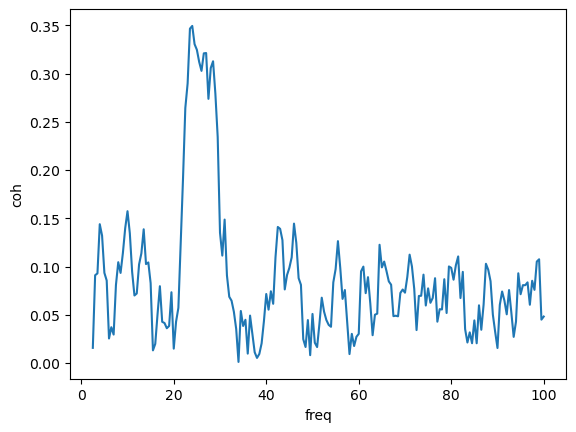

In [30]:
x = con.freqs
y = con.get_data(output='compact')[3]
plt.plot(x, y)
plt.xlabel('freq')
plt.ylabel('coh')
plt.show()

In [31]:
# the 'dense' output will show the connectivity measure's as a 2D array.N x N axis
print(con.get_data(output='dense').shape)
con.get_data(output='dense')

(4, 4, 196)


array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.07969196, 0.15026894, 0.01662269, ..., 0.05033151,
         0.08251712, 0.00039844],
        [0.15132462, 0.1912126 , 0.0741996 , ..., 0.06499466,
         0.04490625, 0.02102754]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.05350945, 0.09875789, 0.06639913, ..., 0.18496489,
         0.14988919, 0.16636163],
        [0.01564312, 0.09097255, 0.09286383, ..., 0.10750751,
         0.04491189, 0.04811033]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,    

# Multivariate connectivity

## Maximised Imaginary part of Coherency (MIC) & Multivariate Interaction Measure (MIM)

In [32]:
epochs_downsampled.info.ch_names

['ECoG_01', 'ECoG_02', 'LFP_01', 'LFP_02']

In [33]:
# Create seed-target indices for connectivity computation
# seed = picks_ch_names.index(seed_ch)
# targets = np.arange(len(picks))
# indices1 = seed_target_indices(seed, targets)
# print(indices1)

indices_ecog_lfp = (np.array([0, 1]),
                    np.array([2, 3]))
print('indices_ecog_lfp:', indices_ecog_lfp)

# theta/alpha and beta ranges
# fmin = (4., 13.)
# fmax = (12., 35.)

multivar_methods = ['mic', 'mim']

(mic, mim) = spectral_connectivity_epochs(data=epochs_downsampled,
                                          method=multivar_methods,
                                          mode= 'multitaper',
                                          indices=indices_ecog_lfp,
                                          rank=None,
                                          #  faverage=True,
                                        #    fmin=4,
                                        #    fmax=35,
                                          #  tmin=,
                                          #  tmax=,
                                          #  sfreq=epochs_downsampled.info['sfreq']
                                          )

print(mic.get_data().shape)

indices_ecog_lfp: (array([0, 1]), array([2, 3]))
(1, 196)


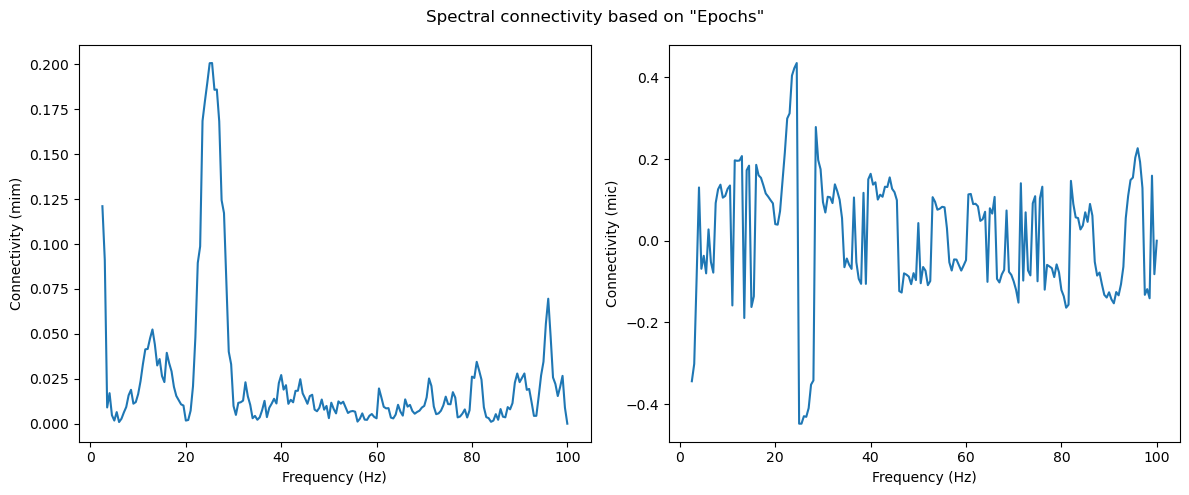

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, method in zip(axes, [mim, mic]):
    ax.plot(method.freqs, method.get_data().flatten())
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(f'Connectivity ({method.method})')


fig.suptitle('Spectral connectivity based on "Epochs"')
fig.tight_layout()
plt.show()

### test: now switch the indecies: --> we should get the same results

indices_ecog_lfp: (array([2, 3]), array([0, 1]))


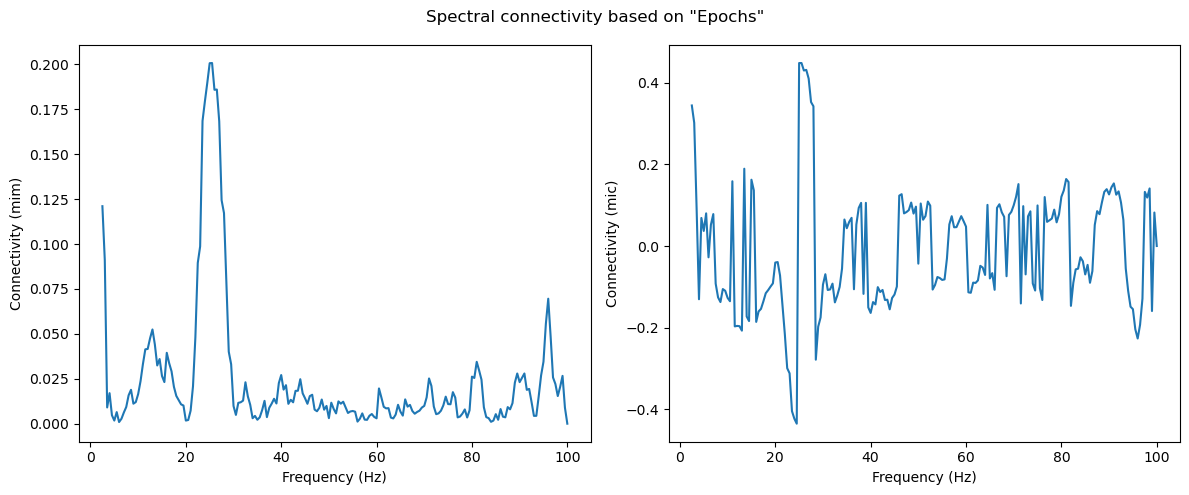

In [35]:
# indices_ecog_lfp = (np.array([0, 1]),
#                     np.array([2, 3]))

indices_ecog_lfp = (np.array([2, 3]),
                    np.array([0, 1]))

print('indices_ecog_lfp:', indices_ecog_lfp)

# theta/alpha and beta ranges
# fmin = (4., 13.)
# fmax = (12., 35.)

multivar_methods = ['mic', 'mim']

(mic, mim) = spectral_connectivity_epochs(data=epochs_downsampled,
                                          method=multivar_methods,
                                          mode= 'multitaper',
                                          indices=indices_ecog_lfp,
                                          rank=None,
                                          #  faverage=True,
                                          #  fmin=fmin,
                                          #  fmax=fmax,
                                          #  tmin=,
                                          #  tmax=,
                                          #  sfreq=epochs_downsampled.info['sfreq']
                                          )

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, method in zip(axes, [mim, mic]):
    ax.plot(method.freqs, method.get_data().flatten())
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(f'Connectivity ({method.method})')


fig.suptitle('Spectral connectivity based on "Epochs"')
fig.tight_layout()
plt.show()

## Multivariate Spectral Granger Causality (GC)

In [36]:
epochs_downsampled.info.ch_names

['ECoG_01', 'ECoG_02', 'LFP_01', 'LFP_02']

In [42]:
# Note: ValueError: indices must be specified when computing Granger causality, as all-to-all connectivity is not supported.
# Note: ValueError: seed and target indices cannot contain repeated channels for multivariate connectivity
# indices_test = (np.array([0, 0]),
#                 np.array([1, 2]))

# theta/alpha and beta ranges
# Note: ValueError: computing Granger causality on multiple frequency bands is not yet supported
# fmin = (4., 13.)
# fmax = (12., 35.)



indices_ecog_lfp = (np.array([0, 1]),
                    np.array([2, 3]))

# indices_ecog_lfp = (np.array([0, 2]),
#                     np.array([1, 3]))

gc_ecog_lfp = spectral_connectivity_epochs(data=epochs_downsampled,
                                          method=['gc'],
                                          mode= 'multitaper',
                                          indices=indices_ecog_lfp,
                                        # rank=(np.array([2]), np.array([2])),
                                          gc_n_lags=40,
                                          # fmin=4,
                                          # fmax=35
                                          )

indices_lfp_ecog = (np.array([2, 3]),
                    np.array([0, 1]))
gc_lfp_ecog = spectral_connectivity_epochs(data=epochs_downsampled,
                                          method=['gc'],
                                          mode= 'multitaper',
                                          indices=indices_lfp_ecog,
                                          rank=None,
                                          gc_n_lags=40,
                                          # fmin=4,
                                          # fmax=35
                                          )

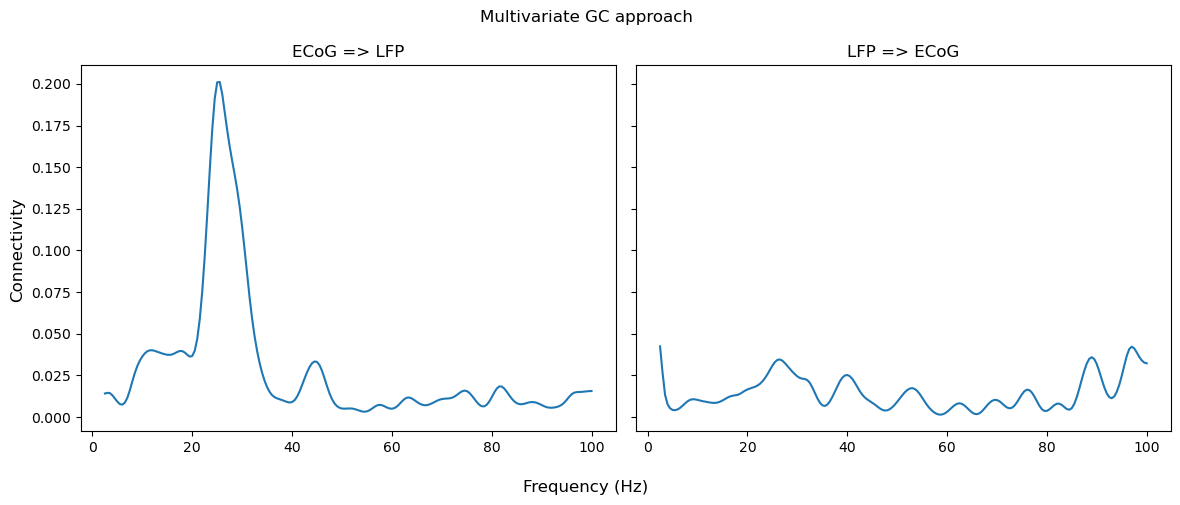

In [38]:
fig, axes = plt.subplots(1,2, figsize=(12, 5), sharey=True)
axes[0].plot(gc_ecog_lfp.freqs, gc_ecog_lfp.get_data()[0])
axes[0].set_title('ECoG => LFP')

axes[1].plot(gc_lfp_ecog.freqs, gc_lfp_ecog.get_data()[0])
axes[1].set_title('LFP => ECoG')

fig.supxlabel('Frequency (Hz)')
fig.suptitle('Multivariate GC approach')
fig.supylabel('Connectivity')
fig.tight_layout()
plt.show()

In [39]:
print('epochs_downsampled shape:', epochs_downsampled.get_data().shape)
print('epochs_downsampled freqs shape:', epochs_downsampled.compute_psd().shape)
print('gc_ecog_lfp.shape:', gc_ecog_lfp.get_data().shape)
print('gc_lfp_eco.shape:', gc_lfp_ecog.get_data().shape)
print('gc_ecog_lfp freqs:', len(gc_ecog_lfp.freqs))


n_freqs_allowed = epochs_downsampled.info['lowpass'] - epochs_downsampled.info['highpass']
print(n_freqs_allowed)
print(len(epochs_downsampled.compute_psd().freqs))
print(epochs_downsampled.compute_psd().freqs)
# epochs_downsampled.compute_psd().plot()
gc_lfp_ecog.freqs[0]

epochs_downsampled.info['highpass']

epochs_downsampled shape: (30, 4, 400)
epochs_downsampled freqs shape: (30, 4, 201)
gc_ecog_lfp.shape: (1, 196)
gc_lfp_eco.shape: (1, 196)
gc_ecog_lfp freqs: 196
100.0
201
[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5 

0.0

In [40]:
np.all(gc_ecog_lfp.get_data() == gc_lfp_ecog.get_data())

net_gc =  gc_ecog_lfp.get_data() - gc_lfp_ecog.get_data()
net_gc

array([[-2.82858346e-02, -1.20793378e-02,  9.96481014e-04,
         5.31782376e-03,  5.87815006e-03,  4.92785902e-03,
         3.66435683e-03,  2.89527760e-03,  3.17690022e-03,
         4.85624638e-03,  7.98660357e-03,  1.20564020e-02,
         1.62134441e-02,  1.99673034e-02,  2.32597128e-02,
         2.60856671e-02,  2.83449191e-02,  2.99272406e-02,
         3.08128199e-02,  3.11035338e-02,  3.09853456e-02,
         3.06359116e-02,  3.01295557e-02,  2.94317883e-02,
         2.85105584e-02,  2.74622920e-02,  2.65260616e-02,
         2.59682502e-02,  2.59281345e-02,  2.62987890e-02,
         2.66477133e-02,  2.63012655e-02,  2.48143688e-02,
         2.25106092e-02,  2.04753514e-02,  2.01157205e-02,
         2.27504587e-02,  2.93780919e-02,  4.05876022e-02,
         5.65264390e-02,  7.68044609e-02,  1.00262091e-01,
         1.24694451e-01,  1.46824628e-01,  1.62907371e-01,
         1.70115711e-01,  1.68138996e-01,  1.59623915e-01,
         1.48632995e-01,  1.38335543e-01,  1.29918582e-0

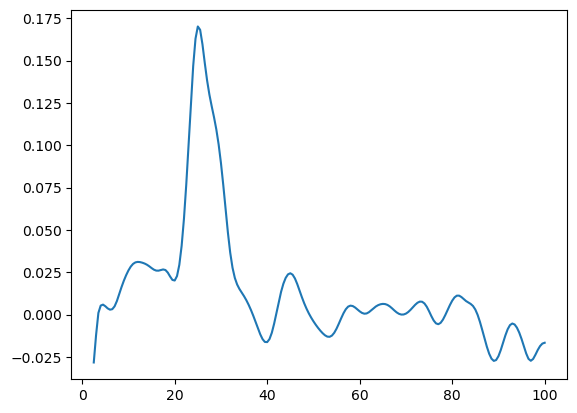

In [41]:
plt.plot(gc_ecog_lfp.freqs, net_gc[0])
plt.show()